## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 57s 1us/step


In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [8]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [17]:
training_set

In [18]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/50
13/13 [==============================] - 37s 3s/step - loss: 1.8273 - accuracy: 0.4688 - val_loss: 0.6540 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 18s 1s/step - loss: 0.6924 - accuracy: 0.5337 - val_loss: 0.6739 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 21s 2s/step - loss: 0.6770 - accuracy: 0.5697 - val_loss: 0.6992 - val_accuracy: 0.4254
Epoch 4/50
13/13 [==============================] - 18s 1s/step - loss: 0.6240 - accuracy: 0.6683 - val_loss: 0.7510 - val_accuracy: 0.3955
Epoch 5/50
13/13 [==============================] - 19s 1s/step - loss: 0.5622 - accuracy: 0.7139 - val_loss: 0.8090 - val_accuracy: 0.4030
Epoch 6/50
13/13 [==============================] - 18s 1s/step - loss: 0.5141 - accuracy: 0.7091 - val_loss: 0.8701 - val_accuracy: 

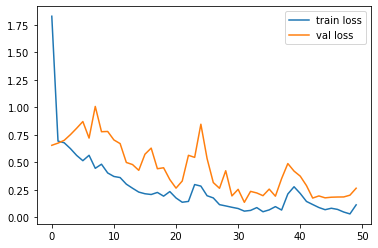

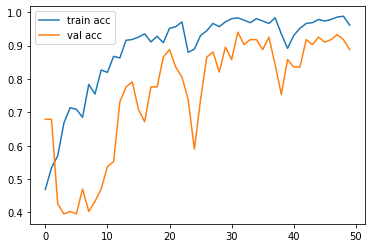

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [23]:

y_pred = model.predict(test_set)


In [24]:
y_pred

array([[9.69097733e-01, 3.09022889e-02],
       [3.32264036e-01, 6.67735994e-01],
       [1.00000000e+00, 1.04664704e-18],
       [1.94185585e-01, 8.05814445e-01],
       [9.99946356e-01, 5.36000916e-05],
       [9.77500796e-01, 2.24992093e-02],
       [6.68229461e-02, 9.33177114e-01],
       [9.99994874e-01, 5.11157350e-06],
       [9.99995708e-01, 4.25712233e-06],
       [8.83092918e-03, 9.91169095e-01],
       [9.99967933e-01, 3.20337604e-05],
       [1.00000000e+00, 4.74372861e-08],
       [9.99999404e-01, 5.70300472e-07],
       [9.31352496e-01, 6.86474964e-02],
       [4.26647440e-02, 9.57335234e-01],
       [9.00905430e-01, 9.90946144e-02],
       [5.94515465e-02, 9.40548480e-01],
       [1.75813306e-02, 9.82418716e-01],
       [9.99999881e-01, 1.50781389e-07],
       [9.99942660e-01, 5.73868856e-05],
       [1.00000000e+00, 9.15808407e-09],
       [2.07769033e-02, 9.79223132e-01],
       [9.99332726e-01, 6.67300483e-04],
       [6.50769830e-01, 3.49230200e-01],
       [9.987741

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_vgg19.h5')

In [30]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [31]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [38]:
a

array([0], dtype=int64)

In [37]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
